In [329]:
import numpy as np
from numpy import matrix
import math
import pandas as pd

# 3.2

In [330]:
def clgs(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    V = A.copy()
    Q = np.eye(m,n)
    R = np.zeros((n,n))
    
    for j in range(n):
        for i in range(j):
            R[i,j] = np.matmul(Q[:,i:i+1].T, A[:,j:j+1])
            V[:,j] = V[:,j] - R[i,j] * Q[:,i]
            
        R[j,j] = np.linalg.norm(V[:,j])
        Q[:,j] = V[:,j] / R[j,j].item()
        
    return Q, R

In [331]:
A = np.array([[45,12,4], [6,10,17], [1,9,51]])
clgs(A)

(array([[ 0.9909875155934487, -0.1071197814276872,  0.0804306929275695],
        [ 0.1321316687457932,  0.6829741494558951, -0.7183923254666966],
        [ 0.0220219447909655,  0.7225452675105424,  0.6909727710595713]]),
 array([[45.40925015897091 , 13.411364377698007,  7.33330761539152 ],
        [ 0.               , 12.04721152502159 , 48.031890058077124],
        [ 0.               ,  0.               , 23.34866456281455 ]]))

In [332]:
def mgs(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    Q = A.copy()
    R = np.zeros((n,n))
    
    for i in range(n):
        R[i,i] = np.linalg.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i,i]
        R[i,i+1:] = np.matmul(Q[:,i:i+1].T, Q[:,i+1:])
        Q[:,i+1:] = Q[:,i+1:] - np.matmul(Q[:,i:i+1], R[i:i+1,i+1:])
    
    return Q, R                         

In [333]:
A = np.array([[45,12,4], [6,10,17], [1,9,51]])
mgs(A)

(array([[ 0.9909875155934487, -0.1071197814276872,  0.0804306929275696],
        [ 0.1321316687457932,  0.6829741494558951, -0.718392325466697 ],
        [ 0.0220219447909655,  0.7225452675105424,  0.690972771059571 ]]),
 array([[45.40925015897091  , 13.411364377698007 ,  7.3333076153915195],
        [ 0.                , 12.04721152502159  , 48.03189005807713  ],
        [ 0.                ,  0.                , 23.34866456281455  ]]))

In [334]:
def qrhouse(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    R = A.copy()
    V = np.zeros((m,n))
    
    for k in range(min(m-1,n)):
        x = R[k:,k:k+1]
        v = x + np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x), 1)
        V[k:,k:k+1] = v
        R[k:,k:] = R[k:,k:] - np.matmul(2*v,np.matmul(v.T, R[k:,k:]))/np.matmul(v.T,v)
    
    R = np.triu(R)
    
    return V, R

In [335]:
A = np.array([[45,12,4], [6,10,17], [1,9,51]])
qrhouse(A)

(array([[90.4092501589709  ,  0.               ,  0.               ],
        [ 6.               , 20.36078910698255 ,  0.               ],
        [ 1.               ,  8.718929596993494,  0.               ]]),
 array([[-45.409250158970906, -13.411364377698003,  -7.33330761539152 ],
        [  0.               , -12.04721152502159 , -48.03189005807714 ],
        [  0.               ,   0.               ,  23.34866456281455 ]]))

In [336]:
def formQ(V):
    V = matrix(V)
    m = V.shape[0]
    n = V.shape[1]
    
    Q = np.eye(m)
    
    for j in range(min(m-1,n)-1, -1, -1):
        v = V[:,j]
        Q = Q-2*v*np.transpose(v)*Q/(np.transpose(v)*v)
    
    return Q

In [337]:
V, R = qrhouse(np.array([[45,12,4], [6,10,17], [1,9,51]]))
formQ(V)

matrix([[-0.9909875155934484,  0.107119781427687 ,  0.0804306929275691],
        [-0.1321316687457932, -0.6829741494558952, -0.718392325466697 ],
        [-0.0220219447909655, -0.7225452675105424,  0.6909727710595711]])

# a

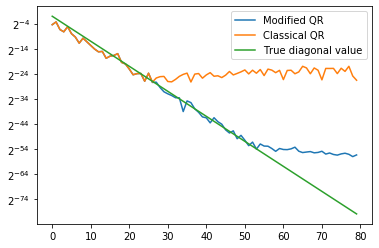

In [338]:
U, X = np.linalg.qr(np.random.randn(80, 80))
V, X = np.linalg.qr(np.random.randn(80, 80))
S = np.zeros((80, 80))
for i in range(80):
    S[i,i] = 2**(-(i+1))
A = np.matmul(np.matmul(U, S), V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

plt.semilogy(np.diag(Rm), basey = 2, label="Modified QR")
plt.semilogy(np.diag(Rc), basey = 2, label="Classical QR")
plt.semilogy(np.diag(S), basey = 2, label="True diagonal value")
plt.legend()

# b: 2-norm of Householder is smaller than that of Modified G-S. Hence, HH has less error and thus more stable.

In [339]:
A = [[.70000,.70711],[.70001,.70711]]
A = matrix(A)
[Qm,Rm] = mgs(A)
[V,R] = qrhouse(A)
Q = formQ(V)

print("Householder QR error: ", np.linalg.norm(np.matmul(Q.T,Q)-np.eye(2)))
print("Modified QR error: ", np.linalg.norm(np.matmul(Qm.T,Qm)-np.eye(2)))

Householder QR error:  3.451616545114987e-16
Modified QR error:  3.254726094493924e-11


# 3.3

In [340]:
def givens(A):
    A = np.array(A, dtype = np.float64)
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()
    
    for j in range(min(m-1,n)):
        for i in range(m-1,j,-1):
            x = R[j,j]
            y = R[i,j]          
            G = np.eye(m)
            
            if y == 0:
                pass 
            elif abs(x) <= abs(y):
                tmp = x/y
                s = 1/math.sqrt(1+tmp**2)
                G[j,j] = tmp * s 
                G[j,i] = s
                G[i,j] = -s
                G[i,i] = tmp * s 
            else:
                tmp = y/x
                c = 1/math.sqrt(1+tmp**2)
                G[j,j] = c
                G[j,i] = tmp * c
                G[i,j] = -tmp * c 
                G[i,i] = c            
            
            R = np.matmul(G,R)
            Q = np.matmul(Q,G.T)
            
    return Q, R

In [341]:
A = np.array([[45,12,4], [6,10,17], [1,9,51]])
givens(A)

(array([[ 0.9909875155934486, -0.1071197814276869,  0.0804306929275691],
        [ 0.1321316687457931,  0.682974149455895 , -0.7183923254666968],
        [ 0.0220219447909655,  0.7225452675105423,  0.690972771059571 ]]),
 array([[ 4.5409250158970913e+01,  1.3411364377698005e+01,
          7.3333076153915195e+00],
        [ 0.0000000000000000e+00,  1.2047211525021588e+01,
          4.8031890058077124e+01],
        [ 0.0000000000000000e+00, -6.5062438535134554e-16,
          2.3348664562814548e+01]]))

# 4.3

In [342]:
def eigenval_plt(m):
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        X,Y = np.linalg.eig(A)
        X = np.sort(X)
        a = X.real
        b = X.imag
        plt.scatter(a,b, s=1)
        c = plt.Circle((0,0),1,fill=False)
        plt.gcf().gca().add_artist(c)

# a: as m goes near infinity, spectral radius will get to 1

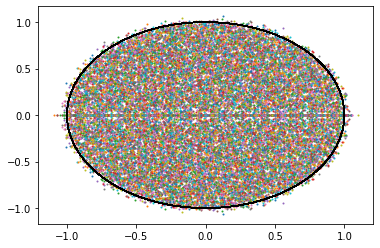

In [343]:
eigenval_plt(256)

# b

In [344]:
def norm_plt(m):
    n = []
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        n.append(np.linalg.norm(A, ord=2))
    plt.boxplot(n)

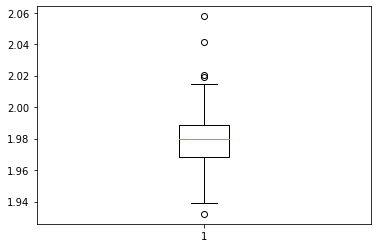

In [345]:
norm_plt(256)

# c

In [346]:
def min_sv(m,n):
    msv = []
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        X, S, Y = np.linalg.svd(A)
        msv.append(np.min(S))
    msv = np.array(msv)
    
    a = [2**(-j) for j in range(n, -1, -1)]
    a.insert(0,0)
    
    hist, Z = np.histogram(msv, a, density=False)
    cd = np.cumsum(hist)
    
    del a[0]
    
    a_ = [math.log(x,2) for x in a]
    plt.bar(a_, cd)
    plt.xlabel("singular value")
    plt.ylabel("cumulative frequency")

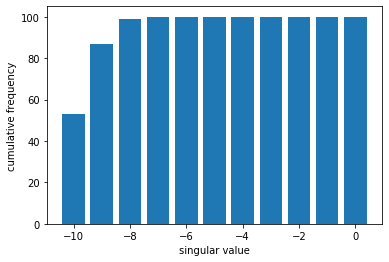

In [347]:
min_sv(512,10)

# d

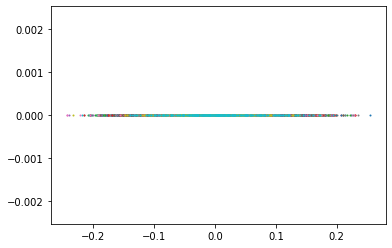

In [348]:
def eigenval_plt_tri(m):
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        A = np.triu(A)
        X,Y = np.linalg.eig(A)
        X = np.sort(X)
        a = X.real
        b = X.imag
        plt.scatter(a,b, s=1)
        c = plt.Circle((0,0),1,fill=False)
        plt.gcf().gca().add_artist(c)

eigenval_plt_tri(256)

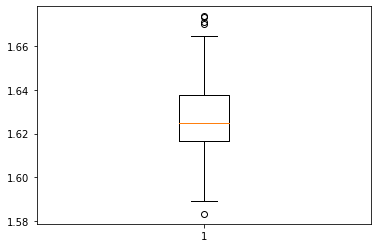

In [349]:
def norm_plt_tri(m):
    n = []
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        A = np.triu(A)
        n.append(np.linalg.norm(A, ord=2))
    plt.boxplot(n)

norm_plt_tri(256)

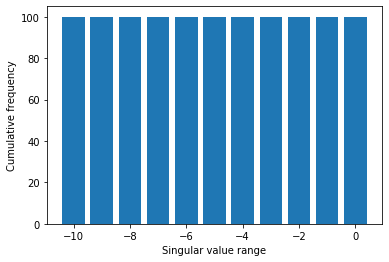

In [350]:
def min_sv_tri(m,n):
    msv = []
    for i in range(100):
        A = np.random.randn(m,m)/math.sqrt(m)
        A = np.triu(A)
        X, S, Y = np.linalg.svd(A)
        msv.append(np.min(S))
    msv = np.array(msv)
    
    a = [2**(-j) for j in range(n, -1, -1)]
    a.insert(0,0)
    
    hist, Z = np.histogram(msv, a, density=False)
    cd = np.cumsum(hist)
   
    del a[0]
    
    a_ = [math.log(x,2) for x in a]
    
    plt.bar(a_, cd)
    plt.xlabel("Singular value range")
    plt.ylabel("Cumulative frequency")

min_sv_tri(256,10)

# 4.6

In [351]:
t = np.linspace(0,1,num=50)
A = np.vander(t,increasing=True)
A = A[:,:12]
b = np.cos(4*t)
np.set_printoptions(precision=16)

# a

In [352]:
normeq = np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,b))
print(normeq)

[ 9.9999999640658233e-01  1.0402268381033251e-06 -8.0000378272232879e+00
  5.3270253269172116e-04  1.0662806004134564e+01  1.6468090491389812e-02
 -5.7338792034135340e+00  8.5095548681068015e-02  1.5026045757718403e+00
  1.4757086539834277e-01 -4.3361548252232152e-01  9.8810074115828511e-02]


# b

In [353]:
Q, R = mgs(A)
mgs = np.linalg.solve(R, np.matmul(Q.T,b))
print(mgs)

[ 1.0000000022190916e+00 -7.8074185143097617e-07 -7.9999678133155632e+00
 -5.1637700826127702e-04  1.0670943116386765e+01 -2.0644528213106195e-02
 -5.6277256510836615e+00 -1.1075896950362038e-01  1.7354947164771368e+00
 -2.4810457718139882e-02 -3.6137479214330759e-01  8.5717914255122235e-02]


# c

In [354]:
Q, R = qrhouse(A)
Q = Q[:,:A.shape[1]]
R = R[:A.shape[1],:]
qrhouse = np.linalg.solve(R, np.matmul(Q.T,b))
print(qrhouse)

[  2.9543012496340877  -3.4979009433774397  -4.655140684468682
   2.5768598841716135   0.5583326105160383   1.9419760150523082
  -9.059938656565759   14.139017079730039  -14.884200546324927
  11.428544344392133   -5.472587604208738    1.1159196321456   ]


# d

In [355]:
Q, R = np.linalg.qr(A)
qr = np.linalg.solve(R, np.matmul(Q.T,b))
print(qr)

[ 1.0000000009965997e+00 -4.2274276230824498e-07 -7.9999812356901456e+00
 -3.1876319259339637e-04  1.0669430795684127e+01 -1.3820287224452070e-02
 -5.6470756291899269e+00 -7.5316021339196196e-02  1.6936069602770731e+00
  6.0321109469623274e-03 -3.7424170430570391e-01  8.8040576218254812e-02]


# f

In [356]:
svd = np.matmul(np.linalg.pinv(A),b)
print(svd)

[ 1.0000000009965988e+00 -4.2274278655440867e-07 -7.9999812356898019e+00
 -3.1876320463197771e-04  1.0669430795722292e+01 -1.3820287451380864e-02
 -5.6470756294438615e+00 -7.5316021684557199e-02  1.6936069610528648e+00
  6.0321112396195531e-03 -3.7424170452868566e-01  8.8040576229104772e-02]


# g

In [357]:
def shade_wrong(r):
    for i in range(6):
        if i < 2:
            return ['color: red']
        else:
            return ''

In [358]:
ind = ['normal', 'mgs','householder','qr', 'svd']
col_list = ['coefficient_%d'%i for i in range(1,13)]
coeffs = np.stack((normeq, mgs, qrhouse, qr, svd),axis=0)
difference = pd.DataFrame(coeffs, index=ind, columns=col_list)
difference.apply(pd.to_numeric).style.apply(shade_wrong,axis=1)
print(difference)

             coefficient_1  coefficient_2  coefficient_3  coefficient_4  \
normal            1.000000   1.040227e-06      -8.000038       0.000533   
mgs               1.000000  -7.807419e-07      -7.999968      -0.000516   
householder       2.954301  -3.497901e+00      -4.655141       2.576860   
qr                1.000000  -4.227428e-07      -7.999981      -0.000319   
svd               1.000000  -4.227428e-07      -7.999981      -0.000319   

             coefficient_5  coefficient_6  coefficient_7  coefficient_8  \
normal           10.662806       0.016468      -5.733879       0.085096   
mgs              10.670943      -0.020645      -5.627726      -0.110759   
householder       0.558333       1.941976      -9.059939      14.139017   
qr               10.669431      -0.013820      -5.647076      -0.075316   
svd              10.669431      -0.013820      -5.647076      -0.075316   

             coefficient_9  coefficient_10  coefficient_11  coefficient_12  
normal            1.5